Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
SPDX-License-Identifier: Apache-2.0

# Data Modeling for Identity Graphs

The following notebook discusses how to construct a graph data model for Identity Graph or Consumer 360 use cases. The content below will cover strategies around what data sources can be used to build an Identity Graph and how to transform those data components into a graph model.

  - [Background](#Background)
  - [Source Data](#Source-Data)
      - [Consumer Data](#Consumer-Data)
      - [Device or Cookie Data](#Device-or-Cookie-Data)
      - [Purchase and Transaction Data](#Purchase-and-Transaction-Data)
  - [Designing the Graph Data Model](#Designing-the-Graph-Data-Model)
      - [Extracting Entities and Attributes](#Extracting-Entities-or-Attributes)
      - [Constructing the Graph](#Constructing-the-Graph)
      - [Extending the Graph Data Model](#Extending-the-Graph-Data-Model)
  - [Conclusion](#Conclusion)
  - [What's Next?](#What's-Next?)
  
## Background

People interact with a number of different businesses on a daily basis.  In modern society, many of these interactions take place on digital platforms such as websites, mobile applications, or via consuming digital media.  As we continue to move away from face-to-face exchanges between consumer and business, it becomes challenging for businesses to cater to the specific needs and desires of their customer base.  Businesses want to know enough about a customer in order to provide them with a personalized experience or to help them find the product or service they are looking to purchase.

Many organizations, today, have information related to user and customer interactions in various, disparate data stores and databases. Obtaining an overall view of these interactions can be difficult. Many of these systems do not have integrations that would allow them to be easily federated. Given these challenges, a common solution is to create a knowledge graph that contains all of these separate data components. Knowledge graphs provide context by linking together data components from disparate data sources and storing them in a central location. Organizations can use these Knowledge Graphs as central identity stores, also commonly referred to as an Identity Graph or a Consumer 360 application. The terms Identity Graph and Consumer 360 can be used interchangeably, although “identity graphs” typically appear more in advertising and marketing circles while “consumer 360” is more of a term used in retail and consumer packaged goods arenas. For the purpose of this discussion we will use the term “identity graph” for simplicity.

Source datasets for constructing an identity graph can widely vary however, common sources typically include cookies, device identifiers, IP addresses, email IDs, social media handles, and internal enterprise IDs to a known person or anonymous profile using privacy-compliant methods. Typically, identity graphs are part of a larger identity resolution architecture. Identity resolution is the process of matching identifiers across a set of devices used by the same person or a household of persons for the purposes of building a representative identity with known personal attributes. Top use cases for identity resolution include targeted advertising, audience segmentation, and product recommendations.

The following guide is meant to be a starting point for the creation of an identity graph data model.  This takes the most common datasets that exist within organizations to construct the initial data model, while also covering various considerations for extending such model for more domain specific uses.  Organizations can use the model here as a canonical representation of an identity graph to build upon.

## Source Data

The use of graph for identity resolution and Consumer 360 provides countless possibilities to stitch disparate datasets together for new insights. The following sections list a number of common datasets that may be found within an organization for building an identity graph.  This is not an exhaustive list and many organizations will have other datasets that may be useful for these purposes.  Primarily, organizations will have a combination of user profile data, user logs (from websites or mobile applications), and product transaction data.  Beyond these datasets, customers may also have access to non-private, third-party information, such as census data, social media posts, call center data, or others that may be combined with these datasets to generate further insights.  Below, we will cover some background on the basic datasets needed to get started.

### Consumer Data

Most organizations will have first-party data related to their known consumers.  This could be in the form of data hosted in a Customer Relationship Management (CRM) platform, in the form of user profiles in an online platform, or some other database containing a person and their identifying attributes.  In many cases, this data may be considered Personal Identifiable Information, or PII, and should be stored in a secure manner with a user’s privacy kept in mind.  As an example, a very basic representation of this data is shown in the table below using fake data.

| Username/ID | First Name  | Last Name  | Address       | Phone Number | Email Address | Birthday |
| ----------- | ----------- | ----- | ----- | ----- | ----- | ----- |
| larry49      | Larry       | Phillips | 46505 William Flat Suite 376\nLeslieside, MS 54982 | 780-995-4351 | lphillips@gmail.com | 3/6/1989 |
| shawn92 | Shawn | Howard | 69792 Nicholas Landing\nConradview, MD 73278 | 512.842.6744 | showard@yahoo.com | 12/12/1973 |
| robert62 | Robert | Montgomery | 5429 Schroeder Center\nNew Beth, MO 13081 | (901)122-1751 | robmont@gmail.com | 9/5/1996 |
| cynthia73 | Cynthia | Williams | 587 Scott Valley Apt. 259\nNorth Lisahaven, RI 47817 | 161.468.1526 | cynthiaw@yahoo.com | 2/18/1987 |

### Device or Cookie Data

Many organizations may also have data representative of anonymous user interactions within their systems and platforms. In a web-based environment, this may be observed as either clickstream data, mobile applications device data, and/or cookie data relevant to web browser interactions. Below is a snippet of what clickstream logs from a web browser may look like. These log entries may contain nothing more than a source IP address, date/time, target request information, and additional information about the user’s client or browser.  These raw interactions are meaningless on their own, but they are snippets of user behavior that can be mined for greater insight.

```
66.182.209.248 - - [30/Apr/2021:18:09:00 +0000] "GET /wp-admin HTTP/1.0" 200 4989 "http://terry-duncan.org/app/tags/category/register/" "Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 5.2; Trident/4.0)"
225.144.20.65 - - [30/Apr/2021:18:12:59 +0000] "GET /app/main/posts HTTP/1.0" 200 5057 "http://www.stephenson.com/posts/post.asp" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_0; rv:1.9.3.20) Gecko/2020-12-23 06:31:59 Firefox/3.6.4"
231.173.0.48 - - [30/Apr/2021:18:14:01 +0000] "GET /list HTTP/1.0" 200 4972 "http://johnston.com/app/homepage.jsp" "Mozilla/5.0 (X11; Linux i686) AppleWebKit/5360 (KHTML, like Gecko) Chrome/14.0.849.0 Safari/5360"
252.219.207.102 - - [30/Apr/2021:18:16:34 +0000] "GET /apps/cart.jsp?appID=5900 HTTP/1.0" 200 4982 "http://craig.net/wp-content/category/homepage/" "Mozilla/5.0 (Windows CE; sl-SI; rv:1.9.0.20) Gecko/2017-05-12 19:40:43 Firefox/10.0"
213.31.146.179 - - [30/Apr/2021:18:17:13 +0000] "PUT /explore HTTP/1.0" 200 5100 "http://ramirez.net/tag/app/privacy/" "Mozilla/5.0 (iPod; U; CPU iPhone OS 3_2 like Mac OS X; en-US) AppleWebKit/532.8.3 (KHTML, like Gecko) Version/4.0.5 Mobile/8B111 Safari/6532.8.3"
```

In other cases, web-based applications may push cookies to a user’s web-browser for the purposes of storing information related to the user’s browsing experience.  These cookies will typically contain a unique ID related to that user’s browser/client and a set of information related to the latest browsing session.  Cookie data is then used to dynamically alter the web-based application’s behavior based on past browsing experience.  Cookies can also be used to store behavioral data related to a user.  Platforms such as Google Analytics or Adobe Analytics allow developers to tag certain actions within a site with custom variables (also sometimes referred to as conversion variables).  These custom variables can either be stored on the user’s cookie, or scripts on the site can be used to fetch the user’s cookie along with the custom variable and send that information back to the web application’s back-end for further analysis. Below is an example of cookie data on the popular consumer site, woot!.

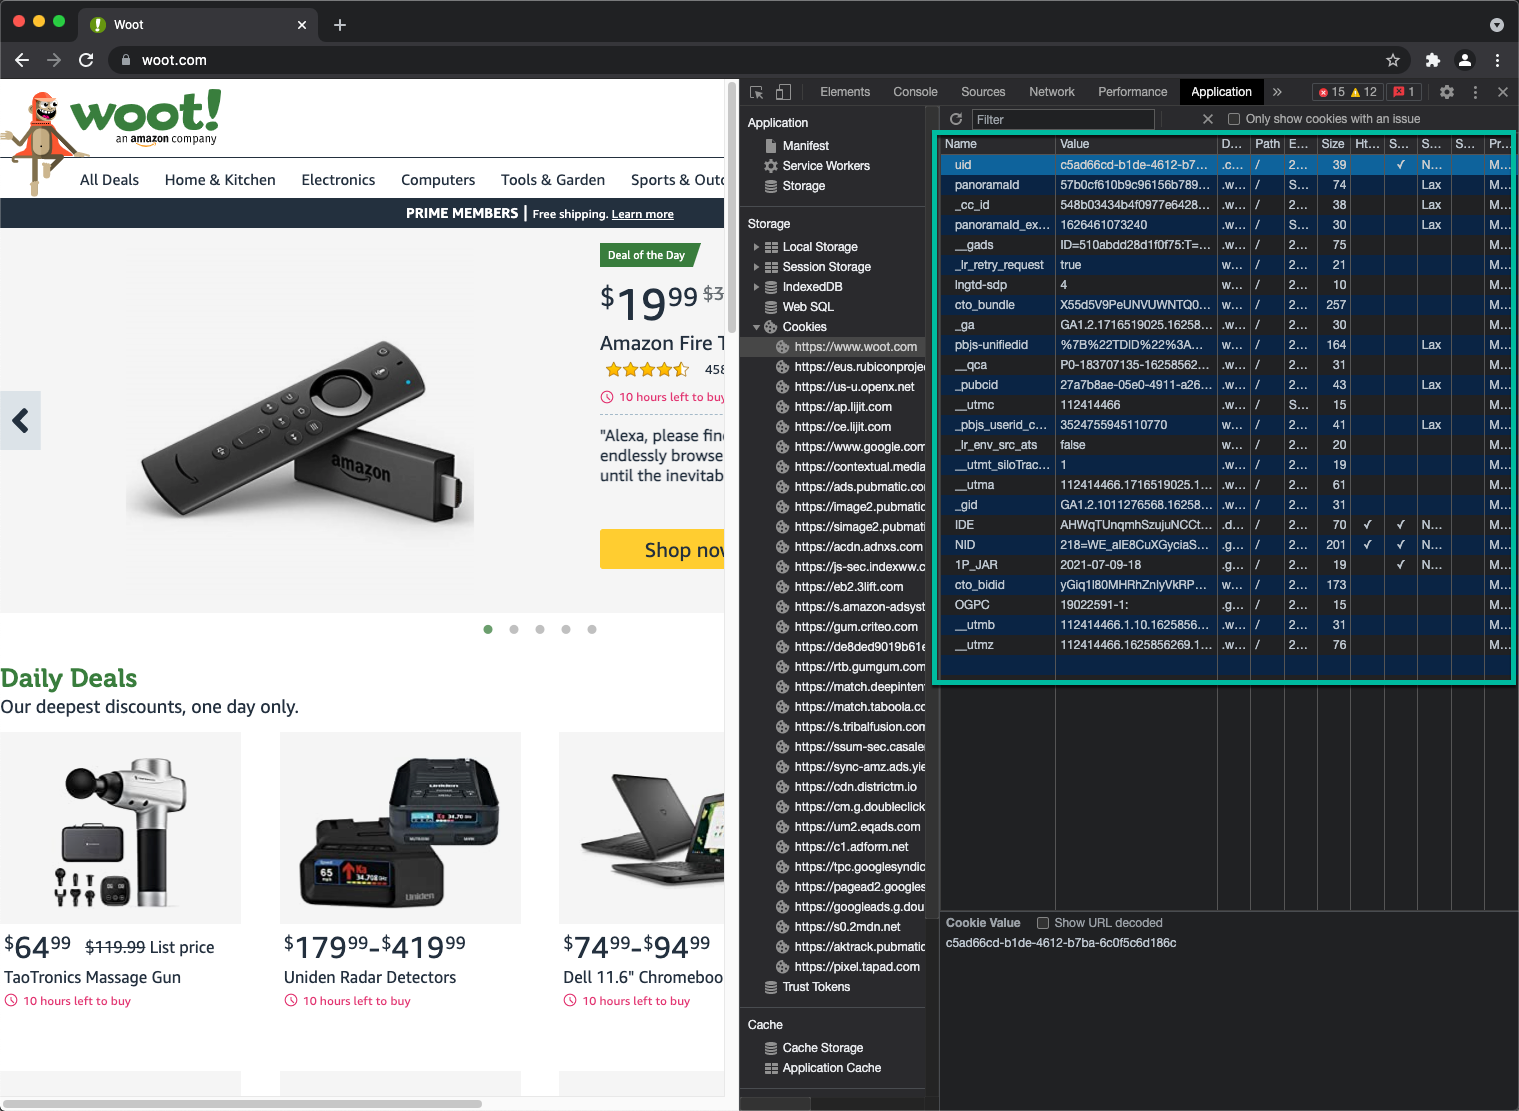


A combination of user cookie and related behavioral information may get stored in a web-application’s backend database in a table similar to the following. In this particular example, we have also included a set of conversion IDs that note customer interest related to product segments.  These are typically coded, as they are in our example.  Not all web-applications track conversion IDs. Yet, the more information that is made available regarding a user’s behavior, the easier it can be to distinguish one user from another. On websites that have a means of user-authentication, additional information can be stored to link an associated first-party cookie with a known, authenticated user. Not all cookies/sessions may be authenticated (and likely, most will not be).

| cookieid | sessionid | last_action | conversionid | user_login |
| --- | --- | --- | --- | --- |
| 806cd382-5af2-41b3-ac36-eb9c5bc56e41 | 97f2a5d0-4051-4f31-b31e-af27ab417196 | 1973-04-15 07:10:23 | x64,x234 | mercadojessica |
| 6cdc9797-c7cf-4259-9373-569ea5f3fd63 | ec3b6b92-45db-45ee-9b3f-0c863c16e6ac | 2011-10-29 14:49:38 | x235,x64 | |
| c1acf4de-a420-4527-b302-a30b529c430c | 5d6d8168-7ae0-4359-b8c1-d21603ebb194 | 1980-09-23 18:16:47 | x64,x663 | larry49 |
| 696d4f7e-d488-4bc2-a57f-f7ad7322b95c | a9e0e4d3-a0a2-4655-b56c-07adcb83413a | 2000-03-12 04:16:4 | x235,x574,x12,x56 | |

### Purchase and Transactions Data

If hosting an eCommerce platform, an organization may also have information related to product purchases or transactions. This information can be very useful in predicting future user behavior. In general, all that is needed to provide additional customer context is information linking a known user with their purchasing habits (converted or non-converted).  The below table is a basic representation of what one may find related to a user and their product purchases.

| username | product_no | purchased_date | product_name | product_category |
| --- | --- | --- | --- | --- |
| larry49 | 123-456789 | 9/23/2020 | “Graph Databases in Action” | Book |
| larry49 | 987-654321 | 8/11/2020 | fidget spinner | Toy |
| robert62 | 567-981234 | 4/24/2020 | 18 piece socket set | Tools |

As a side note, financial related data for a transaction is rarely needed for Consumer 360 or Identity Graph use cases. Although, irreversibly tokenized credit card or bank account information could be used when leveraging a Consumer 360 or Identity Graph to detect certain fraudulent activities. Developers should take caution when adding financial data into this type of workload, as financial data may be subject to certain government-mandated compliance regulations such as PCI.


## Designing the Graph Data Model

Now that we have an accounting of the required data sources, the next step of building an identity graph model is to stitch all of these separate datasets into one cohesive view of a customer, and associated attributes, into a single data store.  To do this, we need to validate that we have matching keys within each of the datasets in order to perform such a stitching.  You can somewhat correlate this to the concept of primary and foreign keys in a relational database.  However, in a graph database, we will not be using these keys to perform ad hoc join operations.  Instead, we will be creating edges that will directly link individual objects (rows from the datasets above) to one another. 

To start this process, we need to extract entities from the above datasets.  Next, we will determine which of the individual components of an entity can be used to stitch related entities together.   Once we have these entities and attributes defined, we can use them to create an initial graph data model.

### Extracting Entities and Attributes

Let’s start with the user profile data (CRM data) from above. We want to evaluate each individual attribute from this dataset and determine which attributes are completely unique to the user (of very “low cardinality”, or potentially only linked to that one user, “single cardinality”). At the same time, we also want to look for attributes that users may have in common (we refer to these attributes as having “medium cardinality” or “high cardinality”).

For a given user profile, a user has the following attributes:

* A username or ID
* First and last Name (and potentially middle name, prefix, suffix, etc.)
* A mailing address (and the various components thereof)
* Phone numbers (home, work, cell)
* An email address
* A birthday

Typically, one of the items in a user profile or CRM system will have uniqueness.  In this example, we’ll assume that the username or user ID is unique in this dataset.  All other components of this dataset could potentially have a cardinality greater than one, or multiple values duplicates.  If we used this as a starting point, then this would give us 6 different entities.  If we continued with the remaining datasets, we could create an entity list such as:

* Username/ID
* First name
* Last name
* Street Address
* City
* State
* Zip Code
* Country
* Phone Number
* Email Address
* Birthday
* IP Address
* Site Visited
* User-Agent Browser
* User-Agent OS
* Cookie ID
* Conversion ID
* Product

Note the items missing from the above list. We are not including things like the timestamp of a given click-stream log entry, nor the time-related data from the last site visit or product purchase. The focus of a Consumer 360 or Identity Graph is to stitch together users and user behavior. We don’t want to store every individual interaction with a customer in the graph. Yet, we want to store a digest of these interactions and how they are linked together. Storage and analysis of each individual interaction can still be accomplished via storing this data in a service meant for log aggregation such as Amazon CloudWatch Logs or Amazon Elasticsearch.

It is also important to consider data normalization when thinking about how data formats may differ between datasets.  As an example, a user may record their mailing address as 101 Elm Street in one portion of your systems, but may abbreviate that as 101 Elm St. in another system.  Data normalization is something that should be handled as part of the ETL process when copying these data points from their source systems into the graph.  We will briefly discuss tools used for data normalization in a later section of this document where we discuss the ETL process for loading data into the graph.

### Constructing the graph

Now that we have all of our entities defined, let’s look at how we would stitch these together as a graph.  Entities that come from the same row in their originating tables/data sources are already linked.  We want to look at persisting those links via edges in the graph.  As an example, let’s take all of the entities associated with a user profile and create a subgraph of those entities.  In the depiction below, we have a given username/ID vertex connected to the other components associated with that given username/ID:

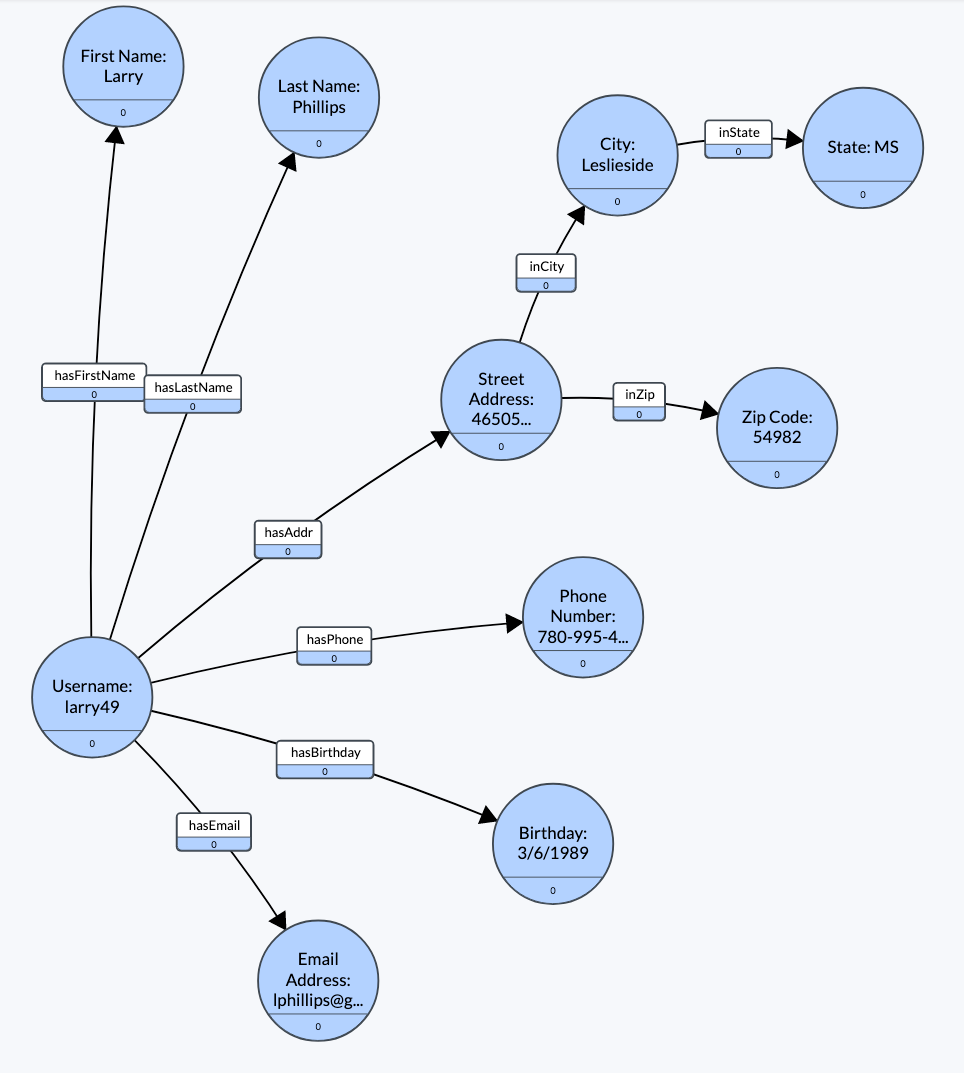

Note how we’ve named each of the edges here as well.  Each relationship gets defined as a first-class object in the graph.  We could also store additional information on the edge.  For example, if a user changed their address, we could keep a date on an edge called “livedUntil” signifying they no longer live there and that was their place of residence until that date.

We have also nested the components of the address.  You could link each component directly to the username vertex, but we’re nesting these objects here to make query expression a bit easier for later.

We could continue adding all of the user profiles from our CRM system into the graph.  As new users are added, the common elements for a user would be dynamically stitched together.  As an example, if Larry were to create a new account with a different email address, we may have a graph that looks like the following.  The linkages between all of the other data elements would signify that it is highly likely that both *larry49* and *larry59* are the same person.

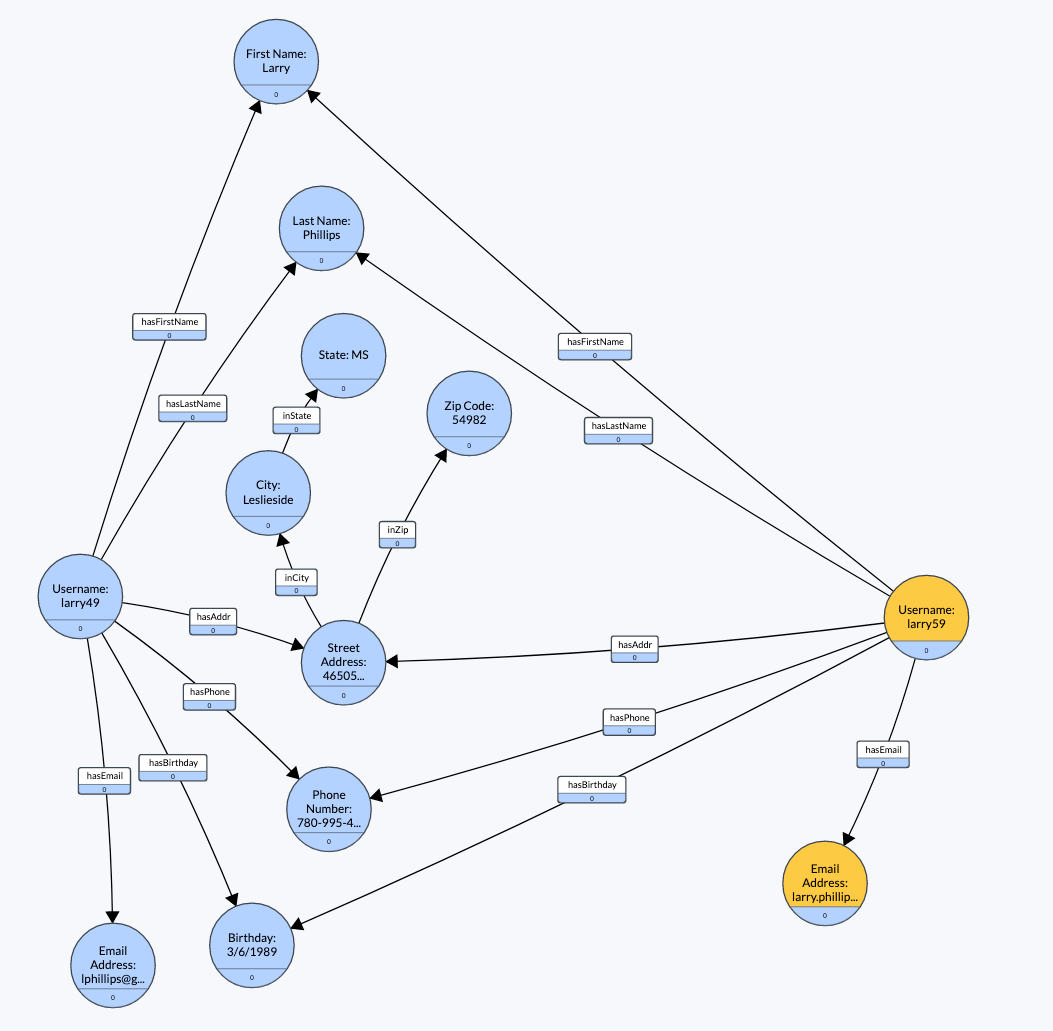


Instead of duplicating each of the attributes in our database, we’ve now directly “joined” each of these attributes to the two users in our CRM data that have the same attribute.  This type of group-by operation in a relational database or even a data warehouse/columnar store would be very expensive.  Instead, in a graph, this is a simple set of one-hop graph traversals.

Moving forward, we can follow this same process for the aggregated clickstream/cookie data and subsequent product/transaction data.  A graph schema for all three of these components may look like the following:

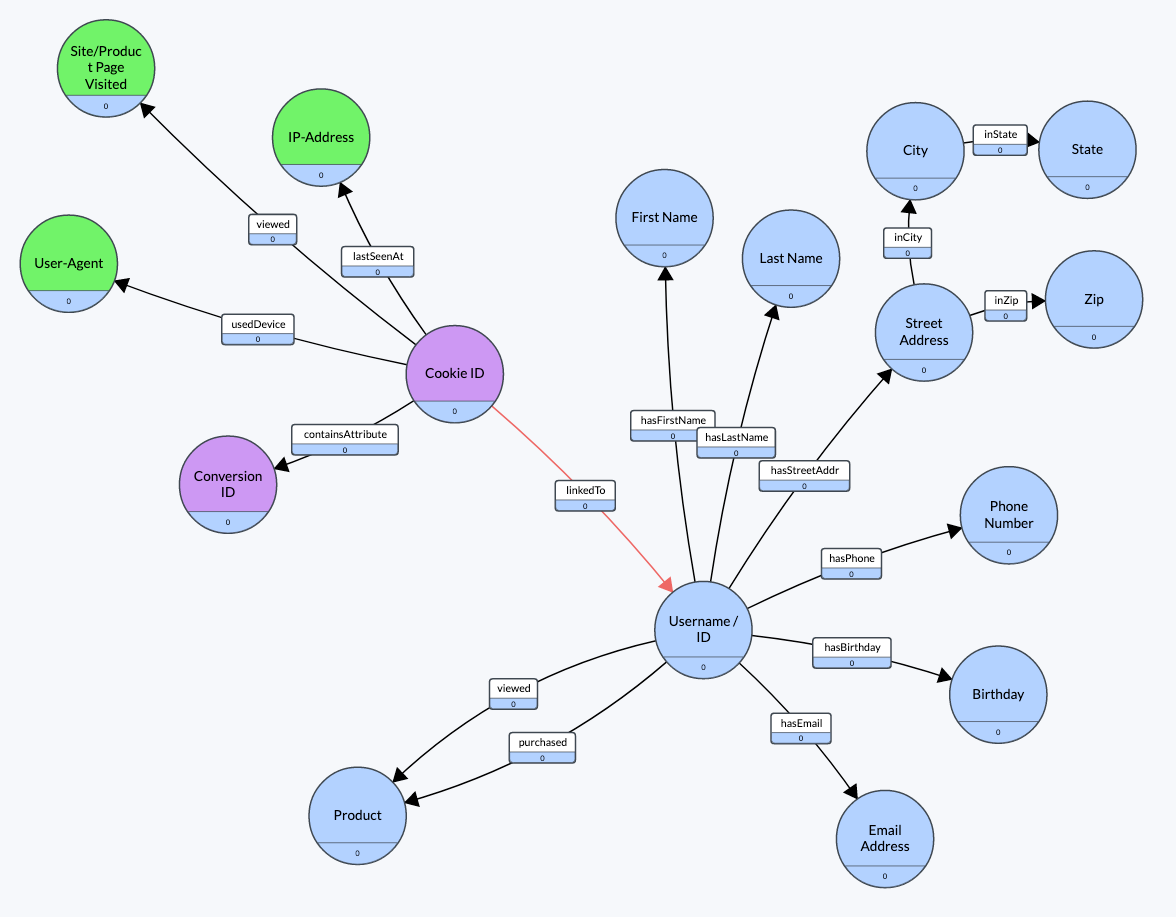

In the above data model, we’ve directly linked each of these disparate datasets together to create one cohesive view of a customer or identity.  Note the RED edge between a cookie ID and a username/ID.  This RED edge is not always present.  Not all cookies can be directly linked to a known user.  If a user starts their journey and then authenticates to our site, we can then provide that connection between the known user and anonymous user (cookie ID).  We may also be able to link a set of anonymous IDs (or cookies) together via the aggregated attributes provided from the clickstream data (such as the last known IP address, recent product pages viewed, and browser/device attributes).


### Extending the Graph Data Model

The source datasets listed above are just some examples of datasets that one may want to use within the context of an Identity Graph.  This list is not exhaustive and there are many other opportunties to include other datasets that have direct relationships with the datasets listed.  When considering additional datasets, one needs to consider how to create the relationships from the new datasets into the existing data model.  As shown above, you will need to stitch the new data to the identities through some sort of known attribute(s).

By way of example, one may want to include social media data as part of their Identity Graph data model.  Social media profiles may contain an email address that can be used to stitch the social media profile to a known user profile.  From there, content related to a user's social media posts can also be stitched into the graph.  This maybe useful when a social media user posts about a given product, or provides a given sentiment based on a certain interaction.  These can factors can be used to drive powerful insights on how users are using products and services offered by an organization.

## Conclusion

Identity graphs are a key component in being able to analyze consumer behavior and provide deep insights on how best to interact with potential customers.  In this notebook, we walked through what potential data sources one may want to consider when constructing an Identity Graph data model.  We also discussed how to stitch these data sources together and how to think about what apsects of the data translate into the different components of the graph.  While the data source listed above are not an exhaustive representation of what one may include in their Identity Graph data model, these data sources are the most commonly used across a myriad of Identity Graph use cases.  Other data sources can be added to accomodate specific use cases across industry verticals.

## What's Next

To build an identity graph solution that incorporates Neptune, we recommend the following resources:
 
- [Getting Started with Amazon Neptune](https://pages.awscloud.com/AWS-Learning-Path-Getting-Started-with-Amazon-Neptune_2020_LP_0009-DAT.html) is a video-based learning path that shows you how to create and connect to a Neptune database, choose a data model and query language, author and tune graph queries, and integrate Neptune with other Amazon Web services.
- Before you begin designing your database, consult the [Amazon Web Services Reference Architectures for Using Graph Databases](https://github.com/aws-samples/aws-dbs-refarch-graph/) GitHub repo, where you can browse examples of reference deployment architectures, and learn more about building a graph data model and choosing a query language.
- For links to documentation, blog posts, videos, and code repositories with samples and tools, see the [Amazon Neptune developer resources](https://aws.amazon.com/neptune/developer-resources/).
- Neptune ML makes it possible to build and train useful machine learning models on large graphs in hours instead of weeks. To find out how to set up and use a graph neural network, see [Using Amazon Neptune ML for machine learning on graphs](https://docs.aws.amazon.com/neptune/latest/userguide/machine-learning.html).
- [Identity Graphs on Amazon Web Services](https://aws.amazon.com/advertising-marketing/identity-graph/) showcases Amazon Web Services solutions specifically designed for identity graphs, focusing on advertising and marketing.
- Cox Automotive scales digital personalization using an identity graph powered by Amazon Neptune with this [blog post](https://aws.amazon.com/blogs/database/cox-automotive-scales-digital-personalization-using-an-identity-graph-powered-by-amazon-neptune/) and [presentation](https://youtu.be/I7_b1xkQ7Dc).